In [515]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [516]:
os.getcwd()

'/workspace'

In [517]:
data = pd.read_csv('Crime_Clean.csv')

In [518]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Total Laborforce,Total Unemployed,Start_Date_Time,Location,Longitude,Latitude,High School %,Bachelors %,Public Transportation %,Unemployed %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,12/06/2019 09:16:00 PM,"(39.2006, -77.1996)",-77.199620,39.200626,0.083714,0.270167,0.049515,0.029053
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,1067.0,31.0,04/13/2019 02:00:00 AM,"(39.1977, -77.1997)",-77.199669,39.197675,0.083714,0.270167,0.049515,0.029053
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,1067.0,31.0,03/13/2020 09:09:00 AM,"(39.2081, -77.1748)",-77.174806,39.208137,0.083714,0.270167,0.049515,0.029053
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,11/15/2019 04:33:00 PM,"(39.2025, -77.1848)",-77.184766,39.202456,0.083714,0.270167,0.049515,0.029053
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,1067.0,31.0,07/22/2016 10:27:00 PM,"(39.205, -77.1643)",-77.164342,39.204973,0.083714,0.270167,0.049515,0.029053


In [519]:
len(data)

235368

In [520]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
High School %                0
Bachelors %                  0
Public Transportation %      0
Unemployed %                 0
dtype: int64

In [521]:
data = data.drop('City',1)

In [522]:
data = data[~data['Crime Name1'].isnull()]

In [523]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
dtype: int64

In [524]:
data = data[data['Crime Name1'] != 'Other']

In [525]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude', 'Crime Name1', 'Crime Name2'],1)

In [526]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name3',
       'Victims', 'Place', 'Pop', 'Income', 'Age', 'Start_Date_Time',
       'Location', 'High School %', 'Bachelors %', 'Public Transportation %',
       'Unemployed %'],
      dtype='object')

In [527]:
data.shape

(187827, 15)

In [528]:
data['Place'].value_counts().loc[lambda x: x > 8000]

Street - In vehicle            27251
Residence - Single Family      14706
Residence - Apartment/Condo    14260
Street - Residential           13815
Other/Unknown                  11922
Parking Lot - Residential      11026
Residence - Driveway            8425
Name: Place, dtype: int64

In [529]:
places = data['Place'].value_counts().loc[lambda x: x > 8000]

top_places = list(places.index.values)

data = data[data['Place'].isin(top_places)]

In [530]:
data = pd.get_dummies(data, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [531]:
data.shape

(101405, 29)

In [532]:
data['Crime Name3'].value_counts().loc[lambda x: (x < 1000) & (x > 300)]

FRAUD - SWINDLE                                      789
PUBLIC PEACE - DISORDERLY CONDUCT                    775
OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           735
PUBLIC PEACE - HARASSING COMMUNICATION               728
TRESPASSING                                          687
RAPE - STRONG-ARM                                    618
ALL OTHER OFFENSES                                   589
DRUGS - MARIJUANA - SELL                             510
DRIVING UNDER THE INFLUENCE DRUGS                    504
FORGERY OF CHECKS                                    479
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)    477
DRUGS - OPIUM OR DERIVATIVE - POSSESS                442
ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON           411
DRUGS - COCAINE - SELL                               377
ASSAULT - AGGRAVATED - NON-FAMILY-OTHER WEAPON       366
WEAPON - POSSESSION                                  363
LIQUOR (DESCRIBE OFFENSE)                            314
WEAPON - CONCEALED             

In [533]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                       15916
DRUGS - MARIJUANA - POSSESS               10427
DRIVING UNDER THE INFLUENCE LIQUOR        10276
ASSAULT - 2ND DEGREE                       6282
DAMAGE PROPERTY - PRIVATE                  5946
IDENTITY THEFT                             4236
LARCENY (DESCRIBE OFFENSE)                 3252
LARCENY - AUTO PARTS                       2913
AUTO THEFT - VEHICLE THEFT                 2749
FRAUD - ILLEGAL USE CREDIT CARDS           2236
LARCENY - FROM BLDG                        2185
BURGLARY - FORCED ENTRY-RESIDENTIAL        2095
DAMAGE PROPERTY (DESCRIBE OFFENSE)         1722
JUVENILE - RUNAWAY                         1693
FRAUD (DESCRIBE OFFENSE)                   1491
ASSAULT - SIMPLE                           1405
FRAUD - IMPERSONATION                      1295
BURGLARY - NO FORCED ENTRY-RESIDENTIAL     1294
FRAUD - CONFIDENCE GAME                    1168
DRUGS - NARCOTIC EQUIP - POSSESS           1072
DRUGS - COCAINE - POSSESS               

In [534]:
import re

In [535]:
pattern1 = r'.*\s*(2ND DEGREE|SIMPLE|AGGRAVATED|INTIMIDATION)\.*'
pattern2 = r'.*\s*(ARSON)\.*'
pattern3 = r'.*\s*(ANIMAL CRUELTY)\.*'
pattern4 = r'.*\s*(BRIBERY)\.*'
pattern5 = r'.*\s*(BURGLARY)\.*'
pattern6 = r'.*\s*(FORGERY|COUNTERFEITING)\.*'
pattern7 = r'.*\s*(VANDALISM|DAMAGE)\.*'
pattern8 = r'.*\s*(DRUGS)\.*'
pattern9 = r'.*\s*(EXTORTION)\.*'
pattern10 = r'.*\s*(EMBEZZLE)\.*'
pattern11 = r'.*\s*(FRAUD|IDENTITY)\.*'
pattern12 = r'.*\s*(GAMBLING|OPERATING|PROMOTING|TAMPERING)\.*'
pattern13 = r'.*\s*(MURDER|MANSLAUGHTER|HOMICIDE)\.*'
pattern14 = r'.*\s*(TRAFFICKING|SERVITUDE)\.*'
pattern15 = r'.*\s*(MISSING|KIDNAPPING|ABDUCTION)\.*'
pattern16 = r'.*\s*(LARCENY)\.*'
pattern17 = r'.*\s*(AUTO THEFT)\.*'
pattern18 = r'.*\s*(PORNOGRAPHY)\.*'
pattern19 = r'.*\s*(PROSTITUTION)\.*'
pattern20 = r'.*\s*(ROBBERY)\.*'
pattern21 = r'.*\s*(RAPE)\.*'
pattern22 = r'.*\s*(SEX)\.*'
pattern23 = r'.*\s*(STOLEN)\.*'
pattern24 = r'.*\s*(WEAPON)\.*'
pattern25 = r'.*\s*(BAD CHECKS)\.*'
pattern26 = r'.*\s*(LOITERING|CURFEW|VAGRANCY)\.*'
pattern27 = r'.*\s*(DISORDERLY|PEACE|OBSTRUCT|UNAUTHORIZED)\.*'
pattern28 = r'.*\s*(INFLUENCE)\.*'
pattern29 = r'.*\s*(DRUNK)\.*'
pattern30 = r'.*\s*(LIQUOR)\.*'
pattern31 = r'.*\s*(PEEPING TOM)\.*'
pattern32 = r'.*\s*(TRESPASSING)\.*'
pattern33 = r'.*\s*(FAMILY OFFENSE)\.*'
pattern34 = r'.*\s*(ALL OTHER OFFENSES)\.*'

for i, rowseries in data.iterrows():
    if re.match(pattern1, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Assault'
    elif re.match(pattern2, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Arson'
    elif re.match(pattern3, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Animal Cruelty'
    elif re.match(pattern4, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Bribery'
    elif re.match(pattern5, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Burglary'
    elif re.match(pattern6, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Forgery'
    elif re.match(pattern7, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Vandalism'
    elif re.match(pattern8, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Drugs'
    elif re.match(pattern9, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Embezzlement'
    elif re.match(pattern10, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Extortion'
    elif re.match(pattern11, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Fraud'
    elif re.match(pattern12, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Gambling'
    elif re.match(pattern13, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Homicide'
    elif re.match(pattern14, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Human Trafficking'
    elif re.match(pattern15, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Kidnapping'
    elif re.match(pattern16, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Larceny'
    elif re.match(pattern17, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Auto Theft'
    elif re.match(pattern18, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Pornography'
    elif re.match(pattern19, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Prostitution'
    elif re.match(pattern20, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Robbery'
    elif re.match(pattern21, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Rape'
    elif re.match(pattern22, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Sexual Assault'
    elif re.match(pattern23, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Stolen Property'
    elif re.match(pattern24, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Weapon'
    elif re.match(pattern25, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Bad Checks'
    elif re.match(pattern26, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Curfew'
    elif re.match(pattern27, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Disoderly Conduct'
    elif re.match(pattern28, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'DUI'
    elif re.match(pattern29, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Drunk'
    elif re.match(pattern30, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Liquor'
    elif re.match(pattern31, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Peeping Tom'
    elif re.match(pattern32, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Trespassing'
    elif re.match(pattern33, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Family Offense'
    elif re.match(pattern33, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'All Other Offenses'
    else:
        data.at[i,'Crime Type'] = 'All Other Offenses'
        
                                            

In [536]:
data['Crime Type'].value_counts()

Larceny               24817
Drugs                 16318
Fraud                 11640
DUI                   10276
Assault                9562
Vandalism              7982
Burglary               3713
Disoderly Conduct      3443
All Other Offenses     2978
Auto Theft             2821
Liquor                 1354
Sexual Assault         1283
Robbery                1166
Weapon                  892
Forgery                 854
Trespassing             687
Rape                    636
Family Offense          361
Extortion               165
Stolen Property         161
Arson                   126
Embezzlement             65
Homicide                 55
Prostitution             21
Drunk                    17
Human Trafficking         9
Kidnapping                3
Name: Crime Type, dtype: int64

In [537]:
rand = data[['Crime Name3','Crime Type']]
rand = data[data['Crime Type'] == 'All Other Offenses']
rand['Crime Name3'].value_counts().loc[lambda x: x > 100]

JUVENILE - RUNAWAY                      1693
ALL OTHER OFFENSES                       589
FUGITIVE FROM JUSTICE (OUT OF STATE)     111
FUGITIVE FROM MD JURISDICTION            110
Name: Crime Name3, dtype: int64

In [538]:
data2 = data[data['Crime Type'] != 'All Other Offenses']
data2['Crime Type'].value_counts()

Larceny              24817
Drugs                16318
Fraud                11640
DUI                  10276
Assault               9562
Vandalism             7982
Burglary              3713
Disoderly Conduct     3443
Auto Theft            2821
Liquor                1354
Sexual Assault        1283
Robbery               1166
Weapon                 892
Forgery                854
Trespassing            687
Rape                   636
Family Offense         361
Extortion              165
Stolen Property        161
Arson                  126
Embezzlement            65
Homicide                55
Prostitution            21
Drunk                   17
Human Trafficking        9
Kidnapping               3
Name: Crime Type, dtype: int64

In [539]:
classes = data2['Crime Type'].value_counts().loc[lambda x: x > 7000]

top_classes = list(classes.index.values)

data2 = data2[data2['Crime Type'].isin(top_classes)]

In [540]:
data['Crime Type'].value_counts()

Larceny               24817
Drugs                 16318
Fraud                 11640
DUI                   10276
Assault                9562
Vandalism              7982
Burglary               3713
Disoderly Conduct      3443
All Other Offenses     2978
Auto Theft             2821
Liquor                 1354
Sexual Assault         1283
Robbery                1166
Weapon                  892
Forgery                 854
Trespassing             687
Rape                    636
Family Offense          361
Extortion               165
Stolen Property         161
Arson                   126
Embezzlement             65
Homicide                 55
Prostitution             21
Drunk                    17
Human Trafficking         9
Kidnapping                3
Name: Crime Type, dtype: int64

In [541]:
top_classes = sorted(top_classes)
top_classes

['Assault', 'DUI', 'Drugs', 'Fraud', 'Larceny', 'Vandalism']

In [542]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data2['Crime Type'] = le.fit_transform(data2['Crime Type'])

In [543]:
features = data2[data2.columns[~data2.columns.isin(['Incident ID','Block','Crime Name3','Crime Type','Location','Start_Date_Time'])]]

In [544]:
features.shape

(80595, 24)

In [545]:
data2['Crime Type'].value_counts()

4    24817
2    16318
3    11640
1    10276
0     9562
5     7982
Name: Crime Type, dtype: int64

In [546]:
labels = np.array(data2['Crime Type'])
features1 = np.array(features)

In [547]:
features1[0]

array([1.00000000e+00, 1.93100000e+03, 2.22619000e+05, 4.87000000e+01,
       1.60633484e-01, 3.13725490e-01, 6.58174098e-02, 4.88687783e-02,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [548]:
labels[0]

4

In [549]:
len(np.unique(labels))

6

In [550]:
num_classes= len(np.unique(labels))

In [551]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features1,labels,test_size=0.25,random_state=4)

In [552]:
train.shape

(60446, 24)

In [553]:
test.shape

(20149, 24)

In [554]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [555]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test, test_labels, model)
print('Mean Accuracy:' + str(np.mean(scores)))

Mean Accuracy:0.3071120234380148


(array([ 7142.,     0.,     0.,     0.,  7658.,     0.,     0.,     0.,
        12327.,     0.,     0.,     0.,  8672.,     0.,     0.,     0.,
        18629.,     0.,     0.,  6018.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

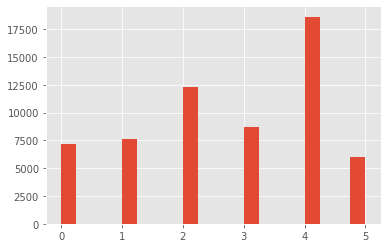

In [556]:
plt.hist(train_labels, bins=20)

In [557]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train, train_labels)

(array([18629.,     0.,     0.,     0., 18629.,     0.,     0.,     0.,
        18629.,     0.,     0.,     0., 18629.,     0.,     0.,     0.,
        18629.,     0.,     0., 18629.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

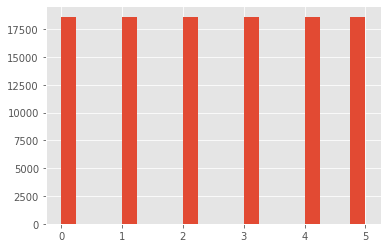

In [558]:
plt.hist(y_sm, bins=20)

In [559]:
smote2 = SMOTE('minority')

X_sm2, y_sm2 = smote2.fit_resample(train, train_labels)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


(array([ 7142.,     0.,     0.,     0.,  7658.,     0.,     0.,     0.,
        12327.,     0.,     0.,     0.,  8672.,     0.,     0.,     0.,
        18629.,     0.,     0., 18629.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

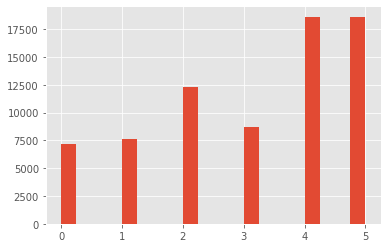

In [560]:
plt.hist(y_sm2, bins=20)

In [561]:
under = RandomUnderSampler('majority')

X_u, Y_u = under.fit_resample(train, train_labels)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


(array([ 7142.,     0.,     0.,     0.,  7658.,     0.,     0.,     0.,
        12327.,     0.,     0.,     0.,  8672.,     0.,     0.,     0.,
         6018.,     0.,     0.,  6018.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

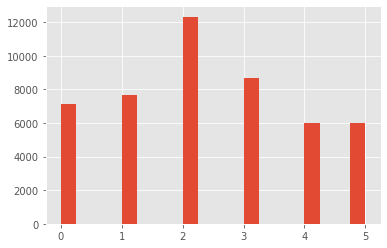

In [562]:
plt.hist(Y_u, bins=20)

In [563]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model1.fit(train,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [564]:
from sklearn.metrics import accuracy_score

predictions = model1.predict(test)

print("Accuracy: " + str(accuracy_score(test_labels, predictions)))

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy: 0.5856866345724353


In [565]:
model1.fit(X_sm,y_sm)

predictions2 = model1.predict(test)

accuracy_score(test_labels, predictions2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.5420616407762172

In [566]:
model1.fit(X_sm2,y_sm2)

predictions3 = model1.predict(test)

accuracy_score(test_labels, predictions3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.5408208844111371

In [567]:
model1.fit(X_u, Y_u)

predictions4 = model1.predict(test)

accuracy_score(test_labels, predictions4)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.5354111866593876

In [568]:
importances = list(model1.feature_importances_)
feature_list = list(features.columns)
feature_importances = [(feature, importance) for feature, importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: Place_Street - In vehicle                Importance: 0.22143568020703147
Variable: Place_Other/Unknown                      Importance: 0.2138759061747313
Variable: Place_Residence - Apartment/Condo        Importance: 0.06179547869249827
Variable: Victims                                  Importance: 0.053304971659632
Variable: Place_Residence - Driveway               Importance: 0.04646220915327121
Variable: Place_Residence - Single Family          Importance: 0.04390995710665227
Variable: Income                                   Importance: 0.04146301209584163
Variable: Place_Parking Lot - Residential          Importance: 0.03896556609502467
Variable: High School %                            Importance: 0.0381871010614394
Variable: Age                                      Importance: 0.03730177476219591
Variable: Public Transportation %                  Importance: 0.03604127236328102
Variable: Bachelors %                              Importance: 0.03568472107222091
Variable

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [569]:
top_features_list = []
top_importances = []

for x,y in feature_importances:
    if(y > 0.025):
        top_features_list.append(x)
        top_importances.append(y)
print(top_features_list)
print(top_importances)

['Place_Street - In vehicle', 'Place_Other/Unknown', 'Place_Residence - Apartment/Condo', 'Victims', 'Place_Residence - Driveway', 'Place_Residence - Single Family', 'Income', 'Place_Parking Lot - Residential', 'High School %', 'Age', 'Public Transportation %', 'Bachelors %', 'Pop', 'Place_Street - Residential', 'Unemployed %']
[0.22143568020703147, 0.2138759061747313, 0.06179547869249827, 0.053304971659632, 0.04646220915327121, 0.04390995710665227, 0.04146301209584163, 0.03896556609502467, 0.0381871010614394, 0.03730177476219591, 0.03604127236328102, 0.03568472107222091, 0.03398467166319212, 0.03348293273933272, 0.03235651406732374]


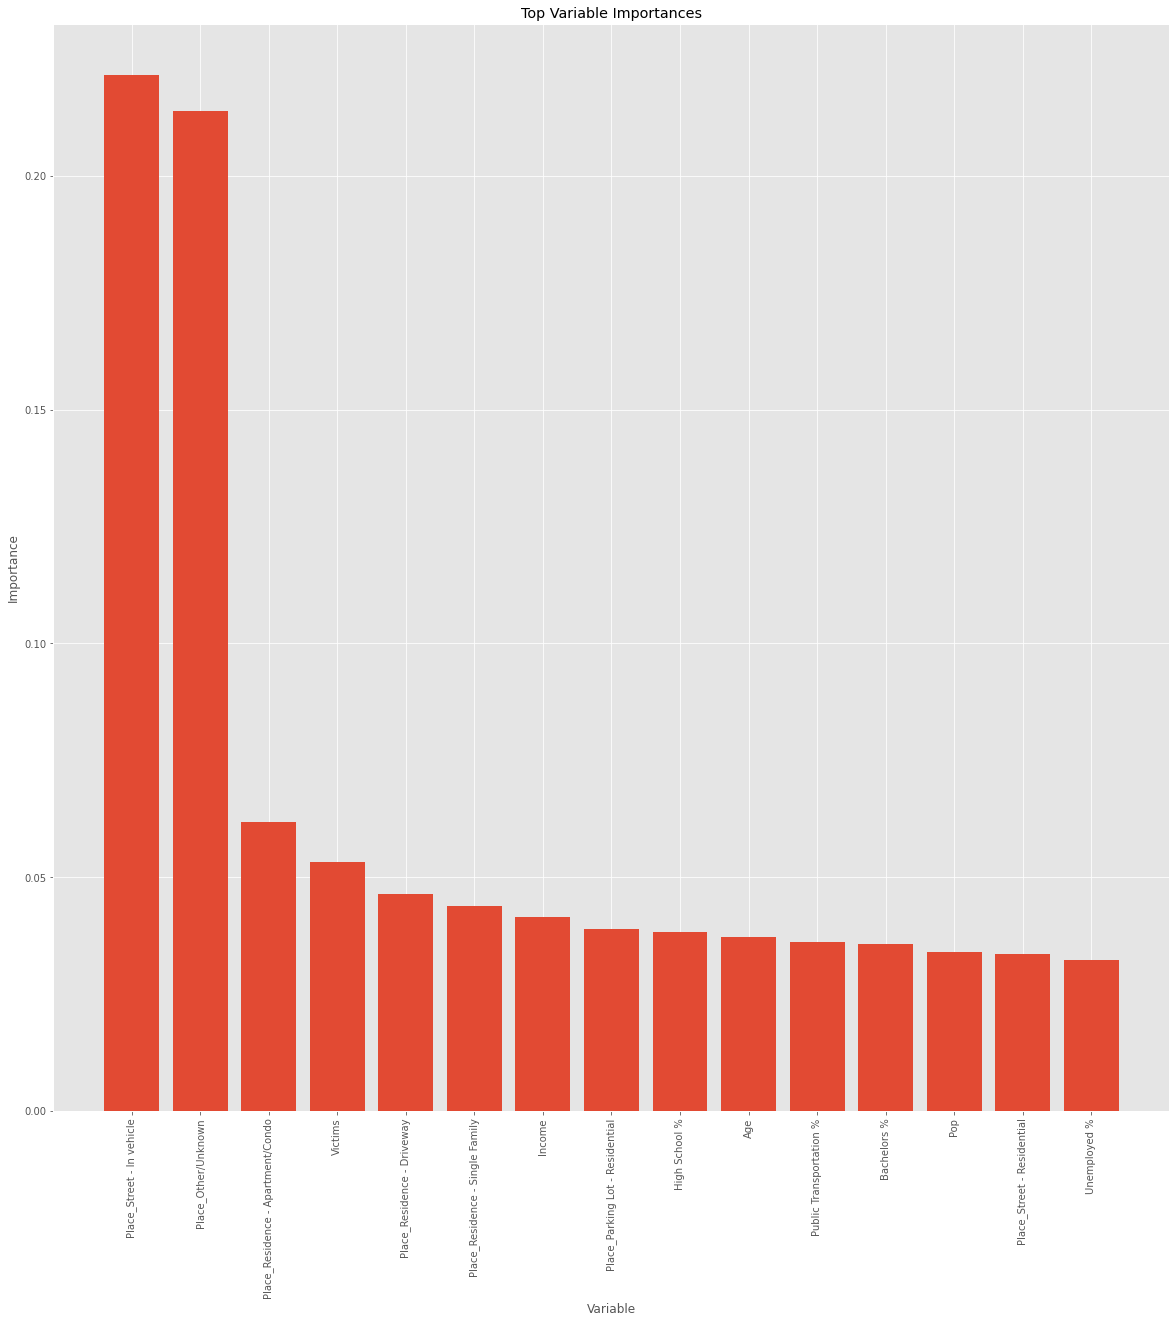

In [570]:
import matplotlib.pyplot as plt

x_values = list(range(len(top_importances)))
plt.bar(x_values, top_importances, orientation= 'vertical')
plt.xticks(x_values, top_features_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [571]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(20,20)

Confusion matrix, without normalization


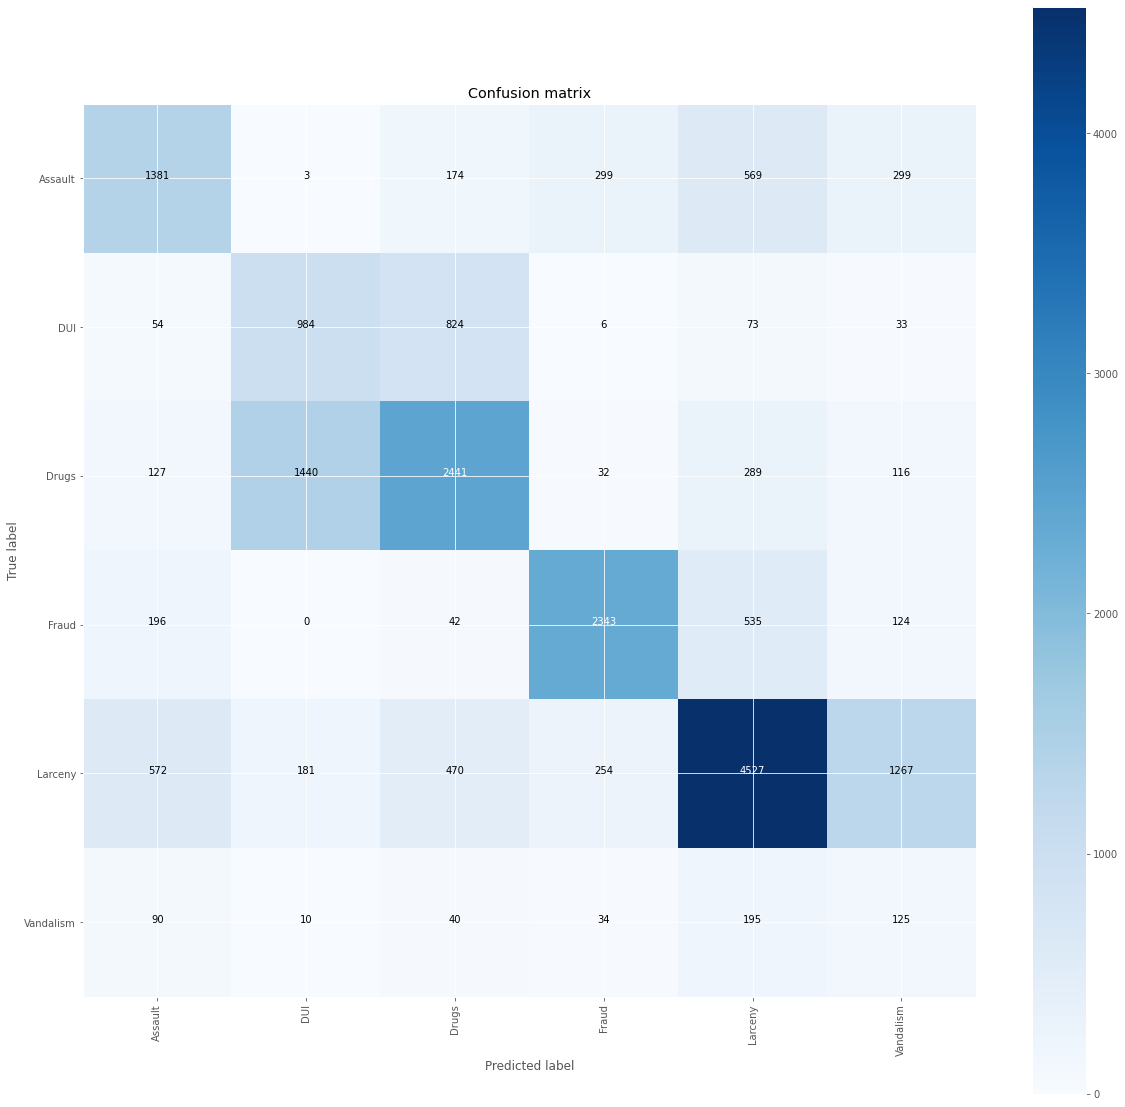

In [572]:
from sklearn.metrics import confusion_matrix

cfn_matrix = confusion_matrix(predictions, test_labels)

disp = plot_confusion_matrix(cfn_matrix, top_classes)

In [573]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 10, verbose = 1, random_state=4)

rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [574]:
print(rs.best_params_)

{'n_estimators': 33, 'min_samples_split': 2, 'max_leaf_nodes': 47, 'max_features': 0.6, 'max_depth': 16, 'bootstrap': False}


In [575]:
best_model = rs.best_estimator_

In [576]:
best_model.fit(train,train_labels)

RandomForestClassifier(bootstrap=False, max_depth=16, max_features=0.6,
                       max_leaf_nodes=47, n_estimators=33, random_state=4)

In [577]:
predictions2 = best_model.predict(test)
accuracy_score(test_labels, predictions2)

0.5915430046156137

In [578]:
importances2 = list(best_model.feature_importances_)
feature_list2 = list(features.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances2]

Variable: Place_Street - In vehicle                Importance: 0.4206562556822051
Variable: Place_Other/Unknown                      Importance: 0.2620500127677537
Variable: Place_Residence - Driveway               Importance: 0.07676297509764077
Variable: Victims                                  Importance: 0.07574952238171331
Variable: Place_Residence - Single Family          Importance: 0.043704495777420777
Variable: Place_Residence - Apartment/Condo        Importance: 0.04096978169746934
Variable: Place_Parking Lot - Residential          Importance: 0.018659243321570224
Variable: Place_Street - Residential               Importance: 0.017398035276659913
Variable: Income                                   Importance: 0.010026727305145564
Variable: High School %                            Importance: 0.007449129773728691
Variable: Police District Name_BETHESDA            Importance: 0.0053329740035592136
Variable: Bachelors %                              Importance: 0.00372061961673394

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [579]:
top_importances2 = []
top_features_list2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)
top_features_list2

['Place_Street - In vehicle',
 'Place_Other/Unknown',
 'Place_Residence - Driveway',
 'Victims',
 'Place_Residence - Single Family',
 'Place_Residence - Apartment/Condo']

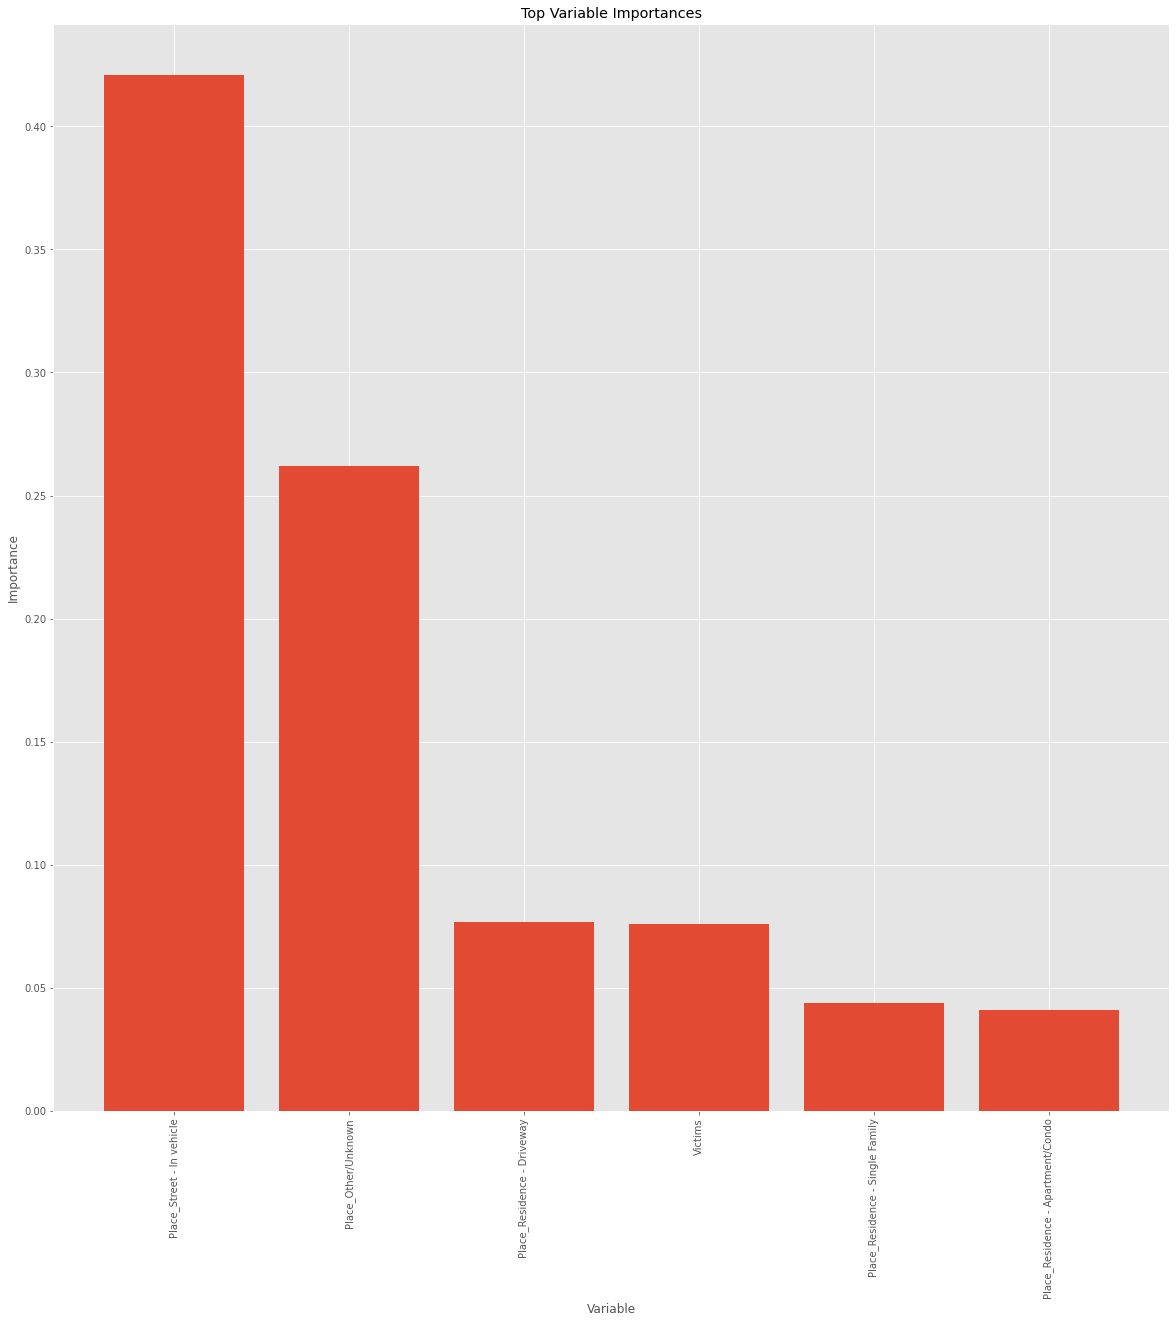

In [580]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Confusion matrix, without normalization


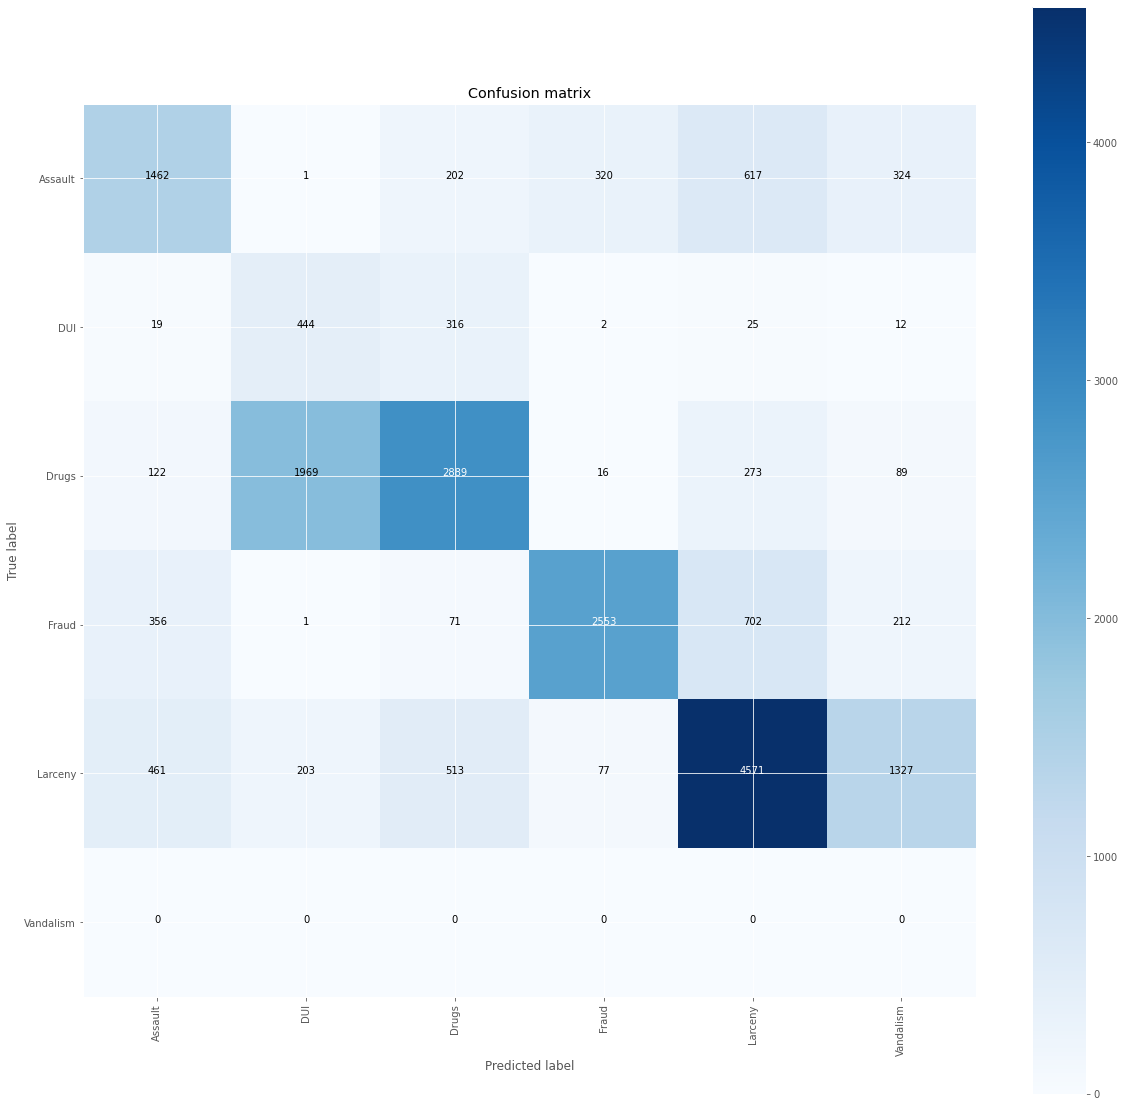

In [581]:
cfn_matrix2 = confusion_matrix(predictions2, test_labels)

disp2 = plot_confusion_matrix(cfn_matrix2, classes=top_classes)

In [582]:
classes2 = data['Crime Name3'].value_counts().loc[lambda x: x > 6000]

top_classes2 = list(classes2.index.values)

data3 = data2[data2['Crime Name3'].isin(top_classes2)]

In [583]:
len(data3)

42901

In [584]:
data3['Crime Name3'].value_counts()

LARCENY - FROM AUTO                   15916
DRUGS - MARIJUANA - POSSESS           10427
DRIVING UNDER THE INFLUENCE LIQUOR    10276
ASSAULT - 2ND DEGREE                   6282
Name: Crime Name3, dtype: int64

In [585]:
top_classes2 = sorted(top_classes2)
top_classes2

['ASSAULT - 2ND DEGREE',
 'DRIVING UNDER THE INFLUENCE LIQUOR',
 'DRUGS - MARIJUANA - POSSESS',
 'LARCENY - FROM AUTO']

In [586]:
le = preprocessing.LabelEncoder()
data3['Crime Name3'] = le.fit_transform(data3['Crime Name3'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [587]:
features2 = data3[data3.columns[~data3.columns.isin(['Incident ID','Block','Crime Name3','Crime Type','Location','Start_Date_Time'])]]

In [588]:
labels2 = np.array(data3['Crime Name3'])
features2 = np.array(features2)

In [589]:
num_classes= len(np.unique(labels2))

In [590]:
train2, test2, train_labels2, test_labels2 = train_test_split(features2,labels2,test_size=0.25,random_state=4)

In [591]:
model2 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model2.fit(train2,train_labels2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [592]:
predictions_new = model2.predict(test2)

print("Accuracy: " + str(accuracy_score(test_labels2, predictions_new)))

Accuracy: 0.6962520977065075


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [593]:
importances3 = list(model2.feature_importances_)
feature_list3 = list(features.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances3]

Variable: Place_Street - In vehicle                Importance: 0.30776211072933773
Variable: Place_Residence - Driveway               Importance: 0.12236890388456716
Variable: Place_Residence - Apartment/Condo        Importance: 0.11253362974239127
Variable: Place_Residence - Single Family          Importance: 0.06379677185531753
Variable: Place_Parking Lot - Residential          Importance: 0.06184192041333236
Variable: Place_Street - Residential               Importance: 0.05089191259302873
Variable: Victims                                  Importance: 0.04759092788638124
Variable: Income                                   Importance: 0.03639986204158782
Variable: Age                                      Importance: 0.031258425203202114
Variable: High School %                            Importance: 0.028552843071834148
Variable: Bachelors %                              Importance: 0.026785841071607287
Variable: Public Transportation %                  Importance: 0.026734154737744324


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [594]:
top_importances3 = []
top_features_list3 = []

for x,y in feature_importances3:
    if(y > 0.025):
        top_features_list3.append(x)
        top_importances3.append(y)
top_features_list3

['Place_Street - In vehicle',
 'Place_Residence - Driveway',
 'Place_Residence - Apartment/Condo',
 'Place_Residence - Single Family',
 'Place_Parking Lot - Residential',
 'Place_Street - Residential',
 'Victims',
 'Income',
 'Age',
 'High School %',
 'Bachelors %',
 'Public Transportation %',
 'Pop',
 'Unemployed %']

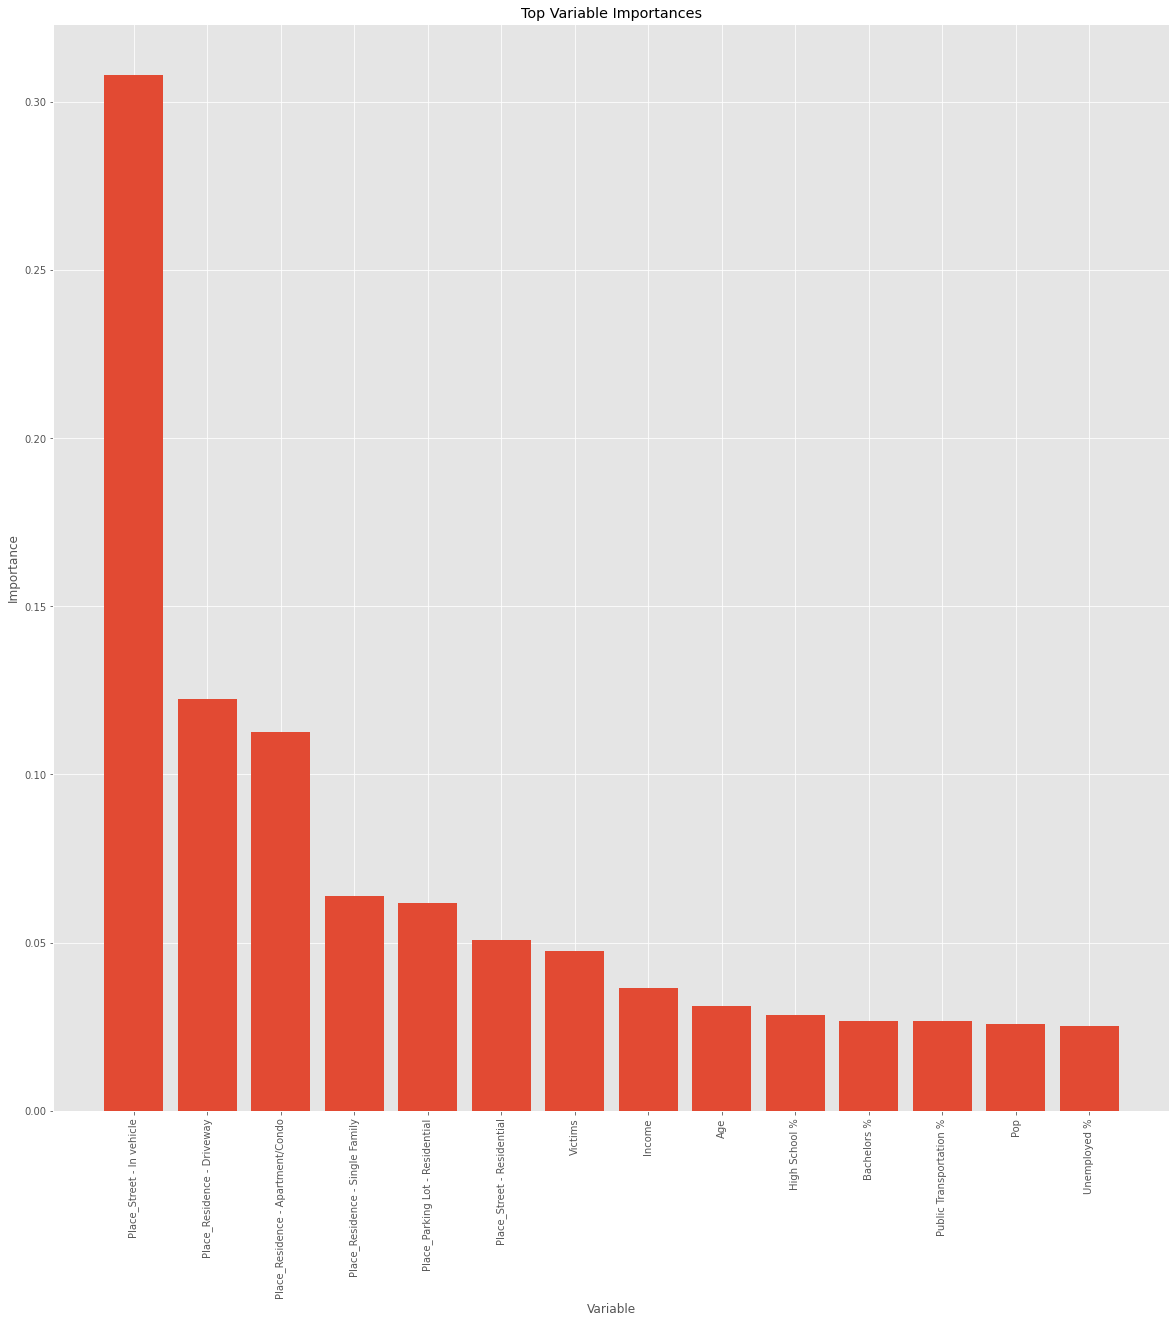

In [596]:
x_values3 = list(range(len(top_importances3)))
plt.bar(x_values3, top_importances3, orientation= 'vertical')
plt.xticks(x_values3, top_features_list3, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Confusion matrix, without normalization


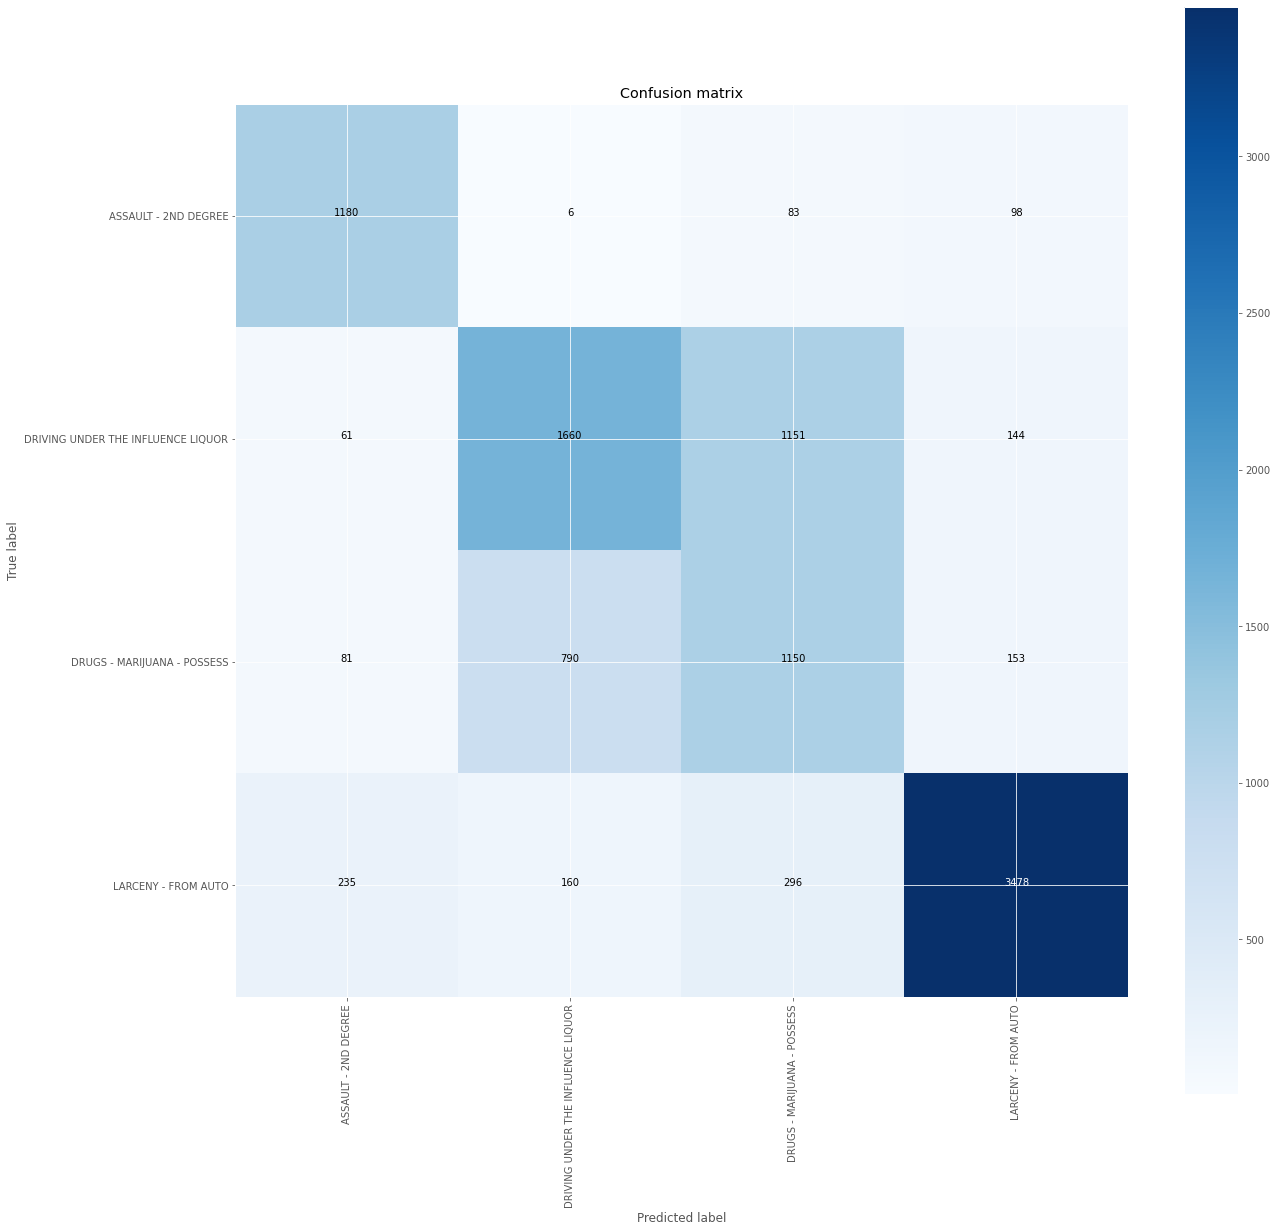

In [598]:
cfn_matrix3 = confusion_matrix(predictions_new, test_labels2)

disp3 = plot_confusion_matrix(cfn_matrix3, classes=top_classes2)